# Plotting pairwise figures
This notebook plots all the pairwise figures for the paper. First it plots the Latin hypercube design with the post spin up shift. Then it plots the predictions from the emulator for:   
a) transition time (Latin hypercube predictions then averaged grid)  
b) rain water path (Latin hypercube then averaged grid)

## Imports, functions, and colour maps

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
import numpy as np
import string
from itertools import combinations

import sys
sys.path.append('py_scripts')
import input_profiles_mod
import emulator_plots as emplt

In [2]:
SMALL_SIZE = 11
MEDIUM_SIZE = 20
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [47]:
p_labels = ['$\mathrm{BL}\,\mathit{q}_{\mathrm{v}}$', '$\mathrm{BL}\,\mathit{z}$', r'$\Delta\theta$', 
            '$\Delta\mathit{q}_{\mathrm{v}}$', '$\mathrm{BL}\,\mathit{N}_{\mathrm{a}}$', '10$^{b_{\mathrm{aut}}}$']
p_names  = ['qv_bl','inv','delt','delq','na','baut']


def add_pairwise_grid(gs, tic_locs, result=True):
    axes = {}
    for count, (i, j) in enumerate(combinations(range(len(p_names)), 2)):
        ax = fig.add_subplot(gs[j-1, i])
        axes[f'{p_names[i]}{p_names[j]}'] = ax

        ax.set_xticks(tic_locs[i])
        ax.set_yticks(tic_locs[j])
        ax.set_xticklabels([str(fl_no) for fl_no in tic_locs[i]])
        ax.set_yticklabels([str(fl_no) for fl_no in tic_locs[j]])
        
        ax.xaxis.set_visible(True if j-1 == 4 else False)
        ax.yaxis.set_visible(True if i == 0 else False)

        if result:
            ax.text(0.015, 0.86, f"({string.ascii_lowercase[count]})", color='black', transform=ax.transAxes,fontsize=BIGGER_SIZE-1, 
                            bbox=dict(facecolor='white', edgecolor='none', pad=0.4, alpha=0.7))

        if count in [0,1,2,3,4]:
            ax.yaxis.set_visible(True)
            ax.yaxis.set_tick_params(left=True, labelleft=True)
            #ax.set_ylabel(p_labels[j])
            ax.text(-0.7,0.5,p_labels[j], transform=ax.transAxes,fontsize=MEDIUM_SIZE,va='center',rotation=90)
        else:
            ax.yaxis.set_tick_params(left=False, labelleft=False)
        if count in [4,8,11,13,14]:
            ax.xaxis.set_visible(True)
            ax.xaxis.set_tick_params(bottom=True, labelbottom=True)
            ax.set_xlabel(p_labels[i])
        else:
            ax.xaxis.set_tick_params(bottom=False, labelbottom=False)
        if count in [0, 5, 9, 12, 14]:
            ax.yaxis.set_visible(True)
            ax.xaxis.set_visible(True)
            ax.yaxis.set_tick_params(right=True, labelright=True)
            ax.xaxis.set_tick_params(top=True, labeltop=True)
            ax.set_xticks(tic_locs[i])
            ax.set_yticks(tic_locs[j])
            
            if count == 0:
                ax.set_xticklabels([str(fl_no) for fl_no in tic_locs[i]])
                ax.set_yticklabels([""]+[str(fl_no) for fl_no in tic_locs[j]][1:])
                ax.text(0.5, 1.3, p_labels[i], transform=ax.transAxes,fontsize=MEDIUM_SIZE,ha='center')
                ax.text(-0.06, 0.02, "500", transform=ax.transAxes,fontsize=SMALL_SIZE,ha='right')
            elif count in [5, 9, 12, 14]:
                ax.set_xticklabels([str(fl_no) for fl_no in tic_locs[i]])
                ax.set_yticklabels([""]+[str(fl_no) for fl_no in tic_locs[j]][1:])
                xlabels = ax.get_xticklabels()
                xlabels[0].set_horizontalalignment('center')
                ax.text(0.6, 1.5, p_labels[i], transform=ax.transAxes,fontsize=MEDIUM_SIZE,ha='center')
            if count == 14:
                ax.set_xticklabels([str(fl_no) for fl_no in tic_locs[i]])
                ax.set_yticklabels([str(fl_no) for fl_no in tic_locs[j]])
                ax.text(1.45, 0.5, p_labels[j], transform=ax.transAxes,fontsize=MEDIUM_SIZE, rotation=270,va='center')

    return axes

In [4]:
cm_data1 =np.loadtxt("ScientificColourMaps6/imola/imola.txt")
cmap1 = colors.LinearSegmentedColormap.from_list('imola', cm_data1)

In [5]:
cm_data2 =np.loadtxt("ScientificColourMaps6/lapaz/lapaz.txt")
cmap2 = colors.LinearSegmentedColormap.from_list('lapaz', cm_data2)
cmap2 = cmap2.reversed()

## Latin hypercube design

In [48]:
data   = np.loadtxt("lh_design/post_spinupvalues/all_post_spinup.csv", delimiter=',', skiprows=1)
design = np.loadtxt("lh_design/original/SCT_EmulatorInputsDesign.csv", delimiter=',', skiprows=1)

data[:,5]   = [10**x for x in data[:,5]]
design[:,5] = [10**x for x in design[:,5]]

# Remove bad post spinup values
data = np.delete(data, (6,7), axis=0)
design = np.delete(design, (6,7), axis=0)

tic_locs = [(7.5, 9.25, 11), (500, 850, 1200), (2, 10, 20), (-7.5, -4.5, -1.5),
                (10, 250, 500), (0.005, 0.025, 0.05)]

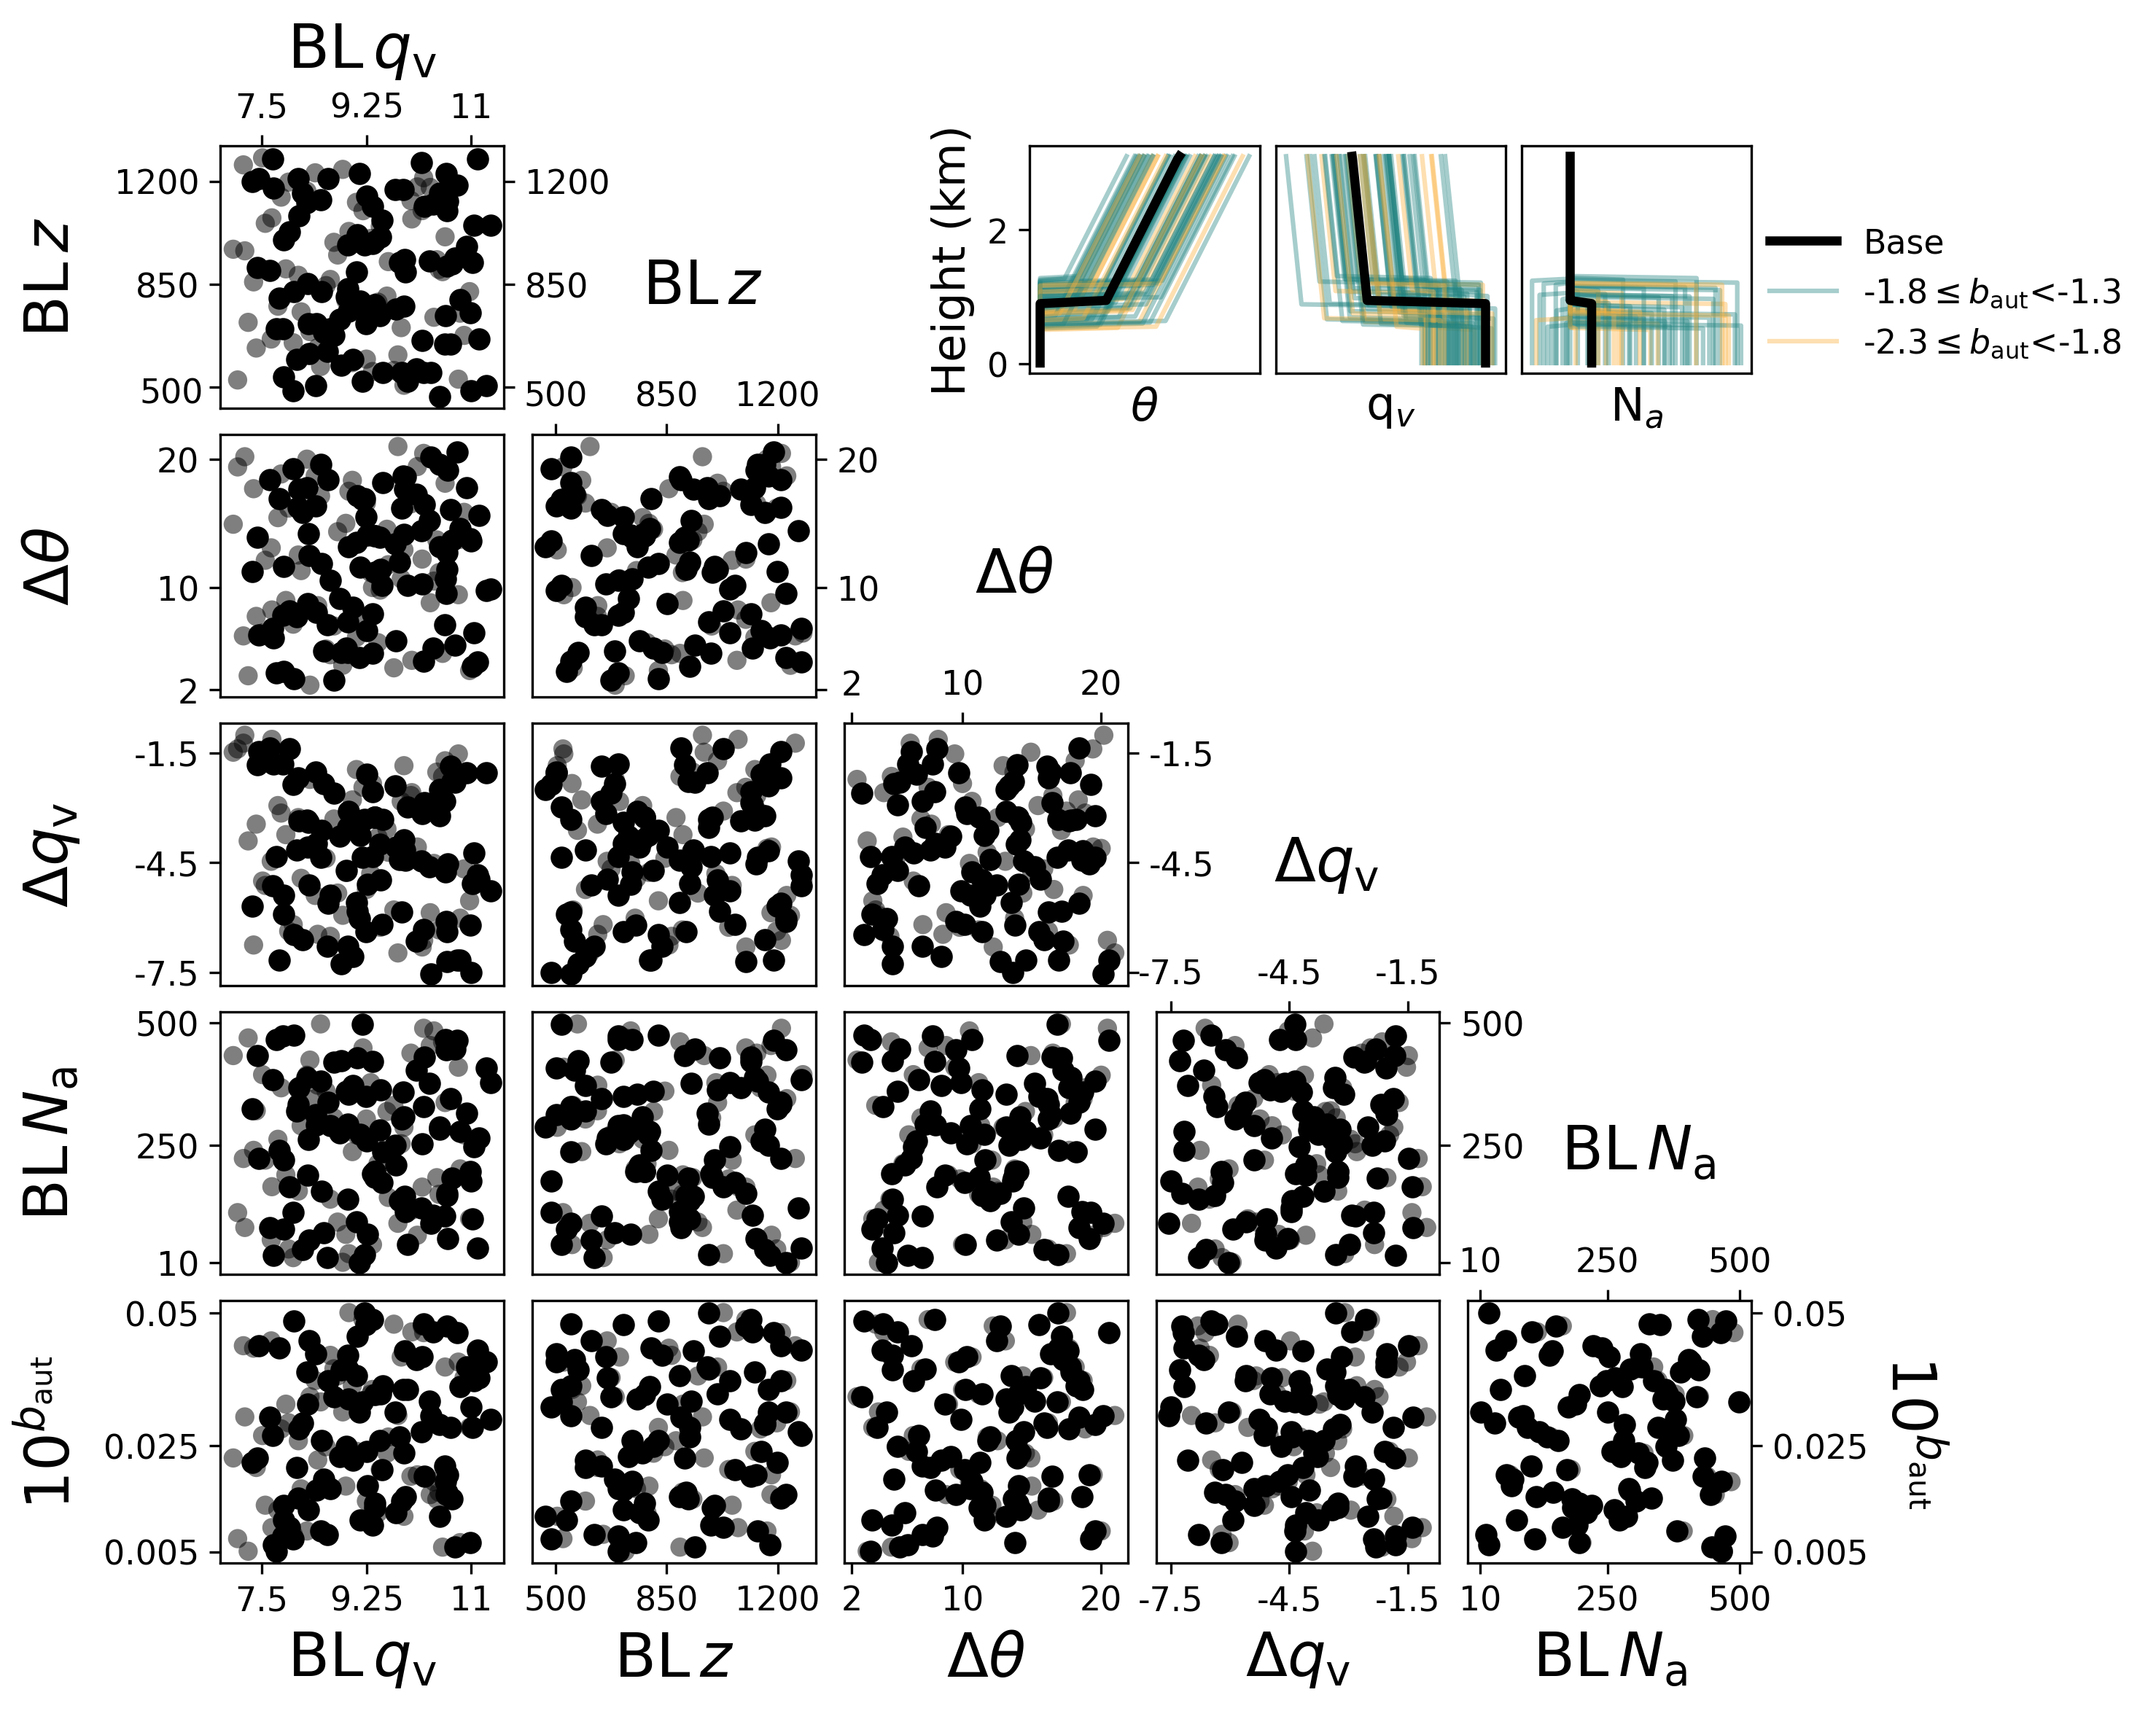

In [49]:
### LH design
fig = plt.figure(figsize=(10,8),dpi=300)
gs0 = GridSpec(5, 5, hspace=0.1, wspace=0.1,left=0.10,bottom=0.09,top=0.9,right=0.8)
gs1 = GridSpec(1, 3, wspace=0.07,left=0.47,bottom=0.77,top=0.9,right=0.8)

axes = add_pairwise_grid(gs0, result=False, tic_locs=tic_locs)

axes_x_limits = []
axes_y_limits = []
for ax, (i,j) in zip(axes.values(), combinations(range(6), 2)):
    ax.scatter(design[:,i], design[:,j], c='black', edgecolor='none', s=40, alpha=0.5)
    ax.scatter(data[:,i], data[:,j], c='black', s=40)
    axes_x_limits.append(ax.get_xlim())
    axes_y_limits.append(ax.get_ylim())

gs1_axes = [fig.add_subplot(gs1[i]) for i in range(3)]

base = input_profiles_mod.base_profiles()

len_of_heights = np.empty(len(design))
th_gradient = ((base["heights_profile"][-1] - base["heights_profile"][2])/
               (base["theta_profile"][-1] - base["theta_profile"][2]))
qv_gradient = ((base["heights_profile"][-1] - base["heights_profile"][2])/
               (base["q_fields_profiles"][len(base["heights_profile"])-1] - base["q_fields_profiles"][2]))

#cols = ['darkorange','slateblue']
cols = ['#FBB13C', '#218380']
base_col = 'black'
a=0.4
b_range = np.linspace(-2.3, -1.3, 3)
bin_dict={}
for i in range(1,3):
    key="bin_{}".format(str(i))
    bin_dict[key] = [b_range[i-1], b_range[i], cols[i-1]]

lines=[]
for i in range(len(design)):
    b_aut, b_col = input_profiles_mod.b_aut_pert(design, i, bin_dict)
    
    heights_profile = input_profiles_mod.heights_profile_pert(base["full_heights_profile"], design, i)
    len_of_heights[i] = len(heights_profile)
    diff = np.delete(np.asarray(heights_profile), 0) - np.delete(np.asarray(heights_profile), -1)
    bool_arr = np.where(diff<0, False, True)
    if np.all(diff) == False:
        print("error")
    theta_profile = input_profiles_mod.theta_profile_pert(base["theta_profile"], design, i, heights_profile, th_gradient)
    length_of_base = len(base["heights_profile"])
    q_fields_profiles, qv_profiles, accum_mass_profile, accum_num_profile = input_profiles_mod.q_fields_profiles_pert(base["q_fields_profiles"], design, i, heights_profile, qv_gradient, length_of_base)

    heights_profile = heights_profile/1000
    gs1_axes[0].plot(theta_profile, heights_profile,c=b_col,alpha=a)
    gs1_axes[1].plot(np.multiply(qv_profiles, 1000), heights_profile,c=b_col,alpha=a)
    line, = gs1_axes[2].plot(np.multiply(accum_num_profile, 1e-6), heights_profile,c=b_col,alpha=a)
    lines.append(line)

gs1_axes[0].set_ylabel("Height (km)", fontsize=BIGGER_SIZE)
for i, (ax, label) in enumerate(zip(gs1_axes, [r"$\theta$", "q$_{v}$", "N$_a$"])):
    ax.set_xlabel(label, fontsize=BIGGER_SIZE)
    ax.xaxis.set_tick_params(bottom=False, labelbottom=False)
    if i!=0:
        ax.yaxis.set_visible(False)
        
aut="aut"
b_width = 3
base["heights_profile"] = base["heights_profile"]/1000
gs1_axes[0].plot(base["theta_profile"], base["heights_profile"], base_col, linewidth=b_width)
gs1_axes[1].plot(np.multiply(base["q_fields_profiles"][:length_of_base],1000), base["heights_profile"], base_col, linewidth=b_width)
b_line, = gs1_axes[2].plot(np.multiply(base["q_fields_profiles"][4*length_of_base:5*length_of_base],1e-6), base["heights_profile"], base_col, linewidth=b_width, label="Base")

gs1_axes[-1].legend([b_line, lines[1], lines[4]], 
                   ["Base", "{:2.2}$\leq${}<{:2.2}".format(bin_dict['bin_2'][0],"$b_{\mathrm{aut}}$",bin_dict['bin_2'][1]), "{:2.2}$\leq${}<{:2.2}".format(bin_dict['bin_1'][0],"$b_{\mathrm{aut}}$",bin_dict['bin_1'][1])],
                   loc=(1.02, 0), frameon=False)

fig.savefig("figures/pairs_lh_design.png", facecolor='white', dpi=300)
fig.savefig("figures/pairs_lh_design.pdf", facecolor='white', dpi=300)

## Transition time

### Latin hypercube predictions

In [66]:
design = np.loadtxt("predictions/lh1000_design.csv", delimiter=',', skiprows=1)
data   = np.loadtxt("predictions/lh1000_transition_time_nv.csv", delimiter=',', skiprows=1)

design[:,5] = [10**x for x in design[:,5]]

tic_locs = [(7.5, 9.25, 11), (500, 850, 1200), (6, 13, 20), (-7.5, -4.5, -1.5),
                (50, 250, 450), (0.01, 0.03, 0.05)]

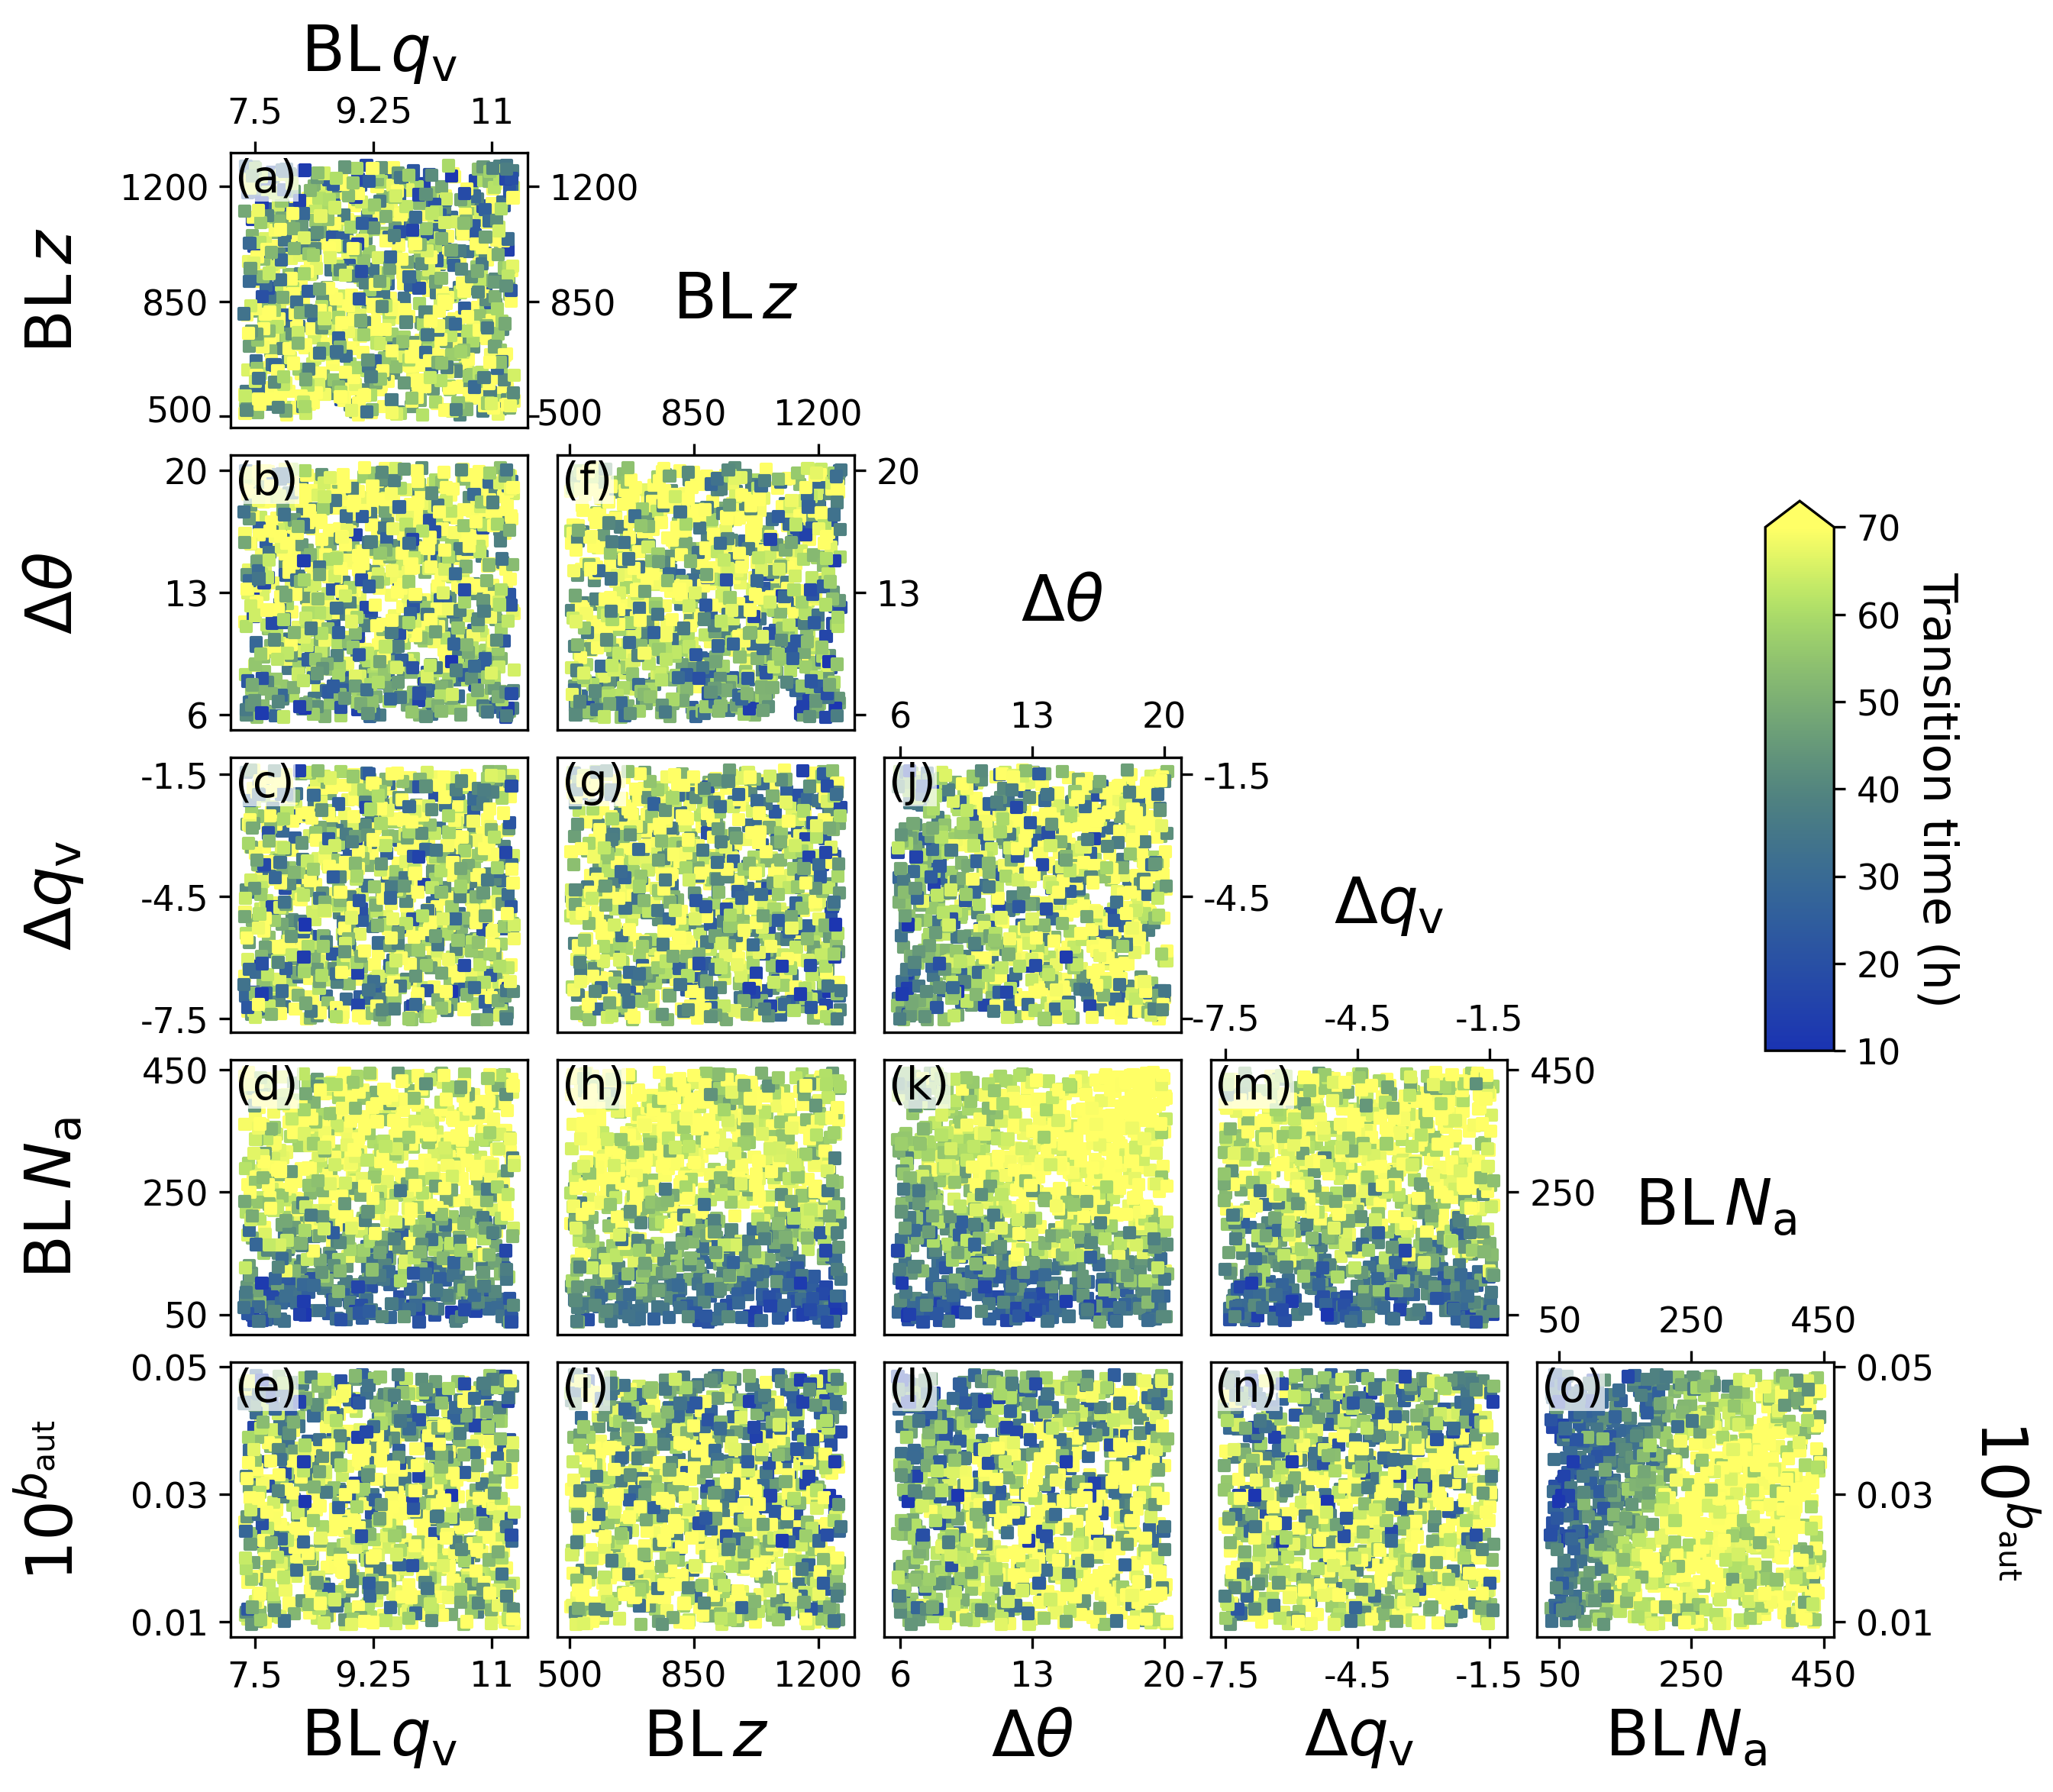

In [67]:
### 1000 LH predictions for transition time
fig = plt.figure(figsize=(10,8),dpi=300)
gs0 = GridSpec(5, 5, hspace=0.1, wspace=0.1,left=0.10,bottom=0.09,top=0.9,right=0.8)

axes = add_pairwise_grid(gs0, tic_locs)

axes_x_limits = []
axes_y_limits = []
for ax, (i,j) in zip(axes.values(), combinations(range(6), 2)):
    c_obj = ax.scatter(design[:,i], design[:,j], c=data[:,1], cmap=cmap1, norm=plt.Normalize(10,70), marker='s', s=10)
    axes_x_limits.append(ax.get_xlim())
    axes_y_limits.append(ax.get_ylim())

    # ax.set_xlim(axes_x_limits[n])
    # ax.set_ylim(axes_y_limits[n])
    # n+=1

gs_c = GridSpec(1, 1,left=0.77,bottom=0.41,top=0.71, right=0.8)
cax = fig.add_subplot(gs_c[0])
cbar = fig.colorbar(c_obj, cax=cax, extend='max')
cbar.ax.set_ylabel('Transition time (h)', rotation=-90, va="bottom", fontsize=BIGGER_SIZE)


fig.savefig("figures/pairs_lh_1000_transition_time.png", facecolor='white', dpi=300)
fig.savefig("figures/pairs_lh_1000_transition_time.pdf", facecolor='white', dpi=300)

### Averaged grid predictions

$\mathrm{BL}\,\mathit{q}_{\mathrm{v}}$ has average main effect contribution of 0.91%
$\mathrm{BL}\,\mathit{z}$ has average main effect contribution of 6.74%
$\Delta\theta$ has average main effect contribution of 8.58%
$\Delta\mathit{q}_{\mathrm{v}}$ has average main effect contribution of 2.21%
$\mathrm{BL}\,\mathit{N}_{\mathrm{a}}$ has average main effect contribution of 60.50%
10$^{b_{\mathrm{aut}}}$ has average main effect contribution of 14.35%


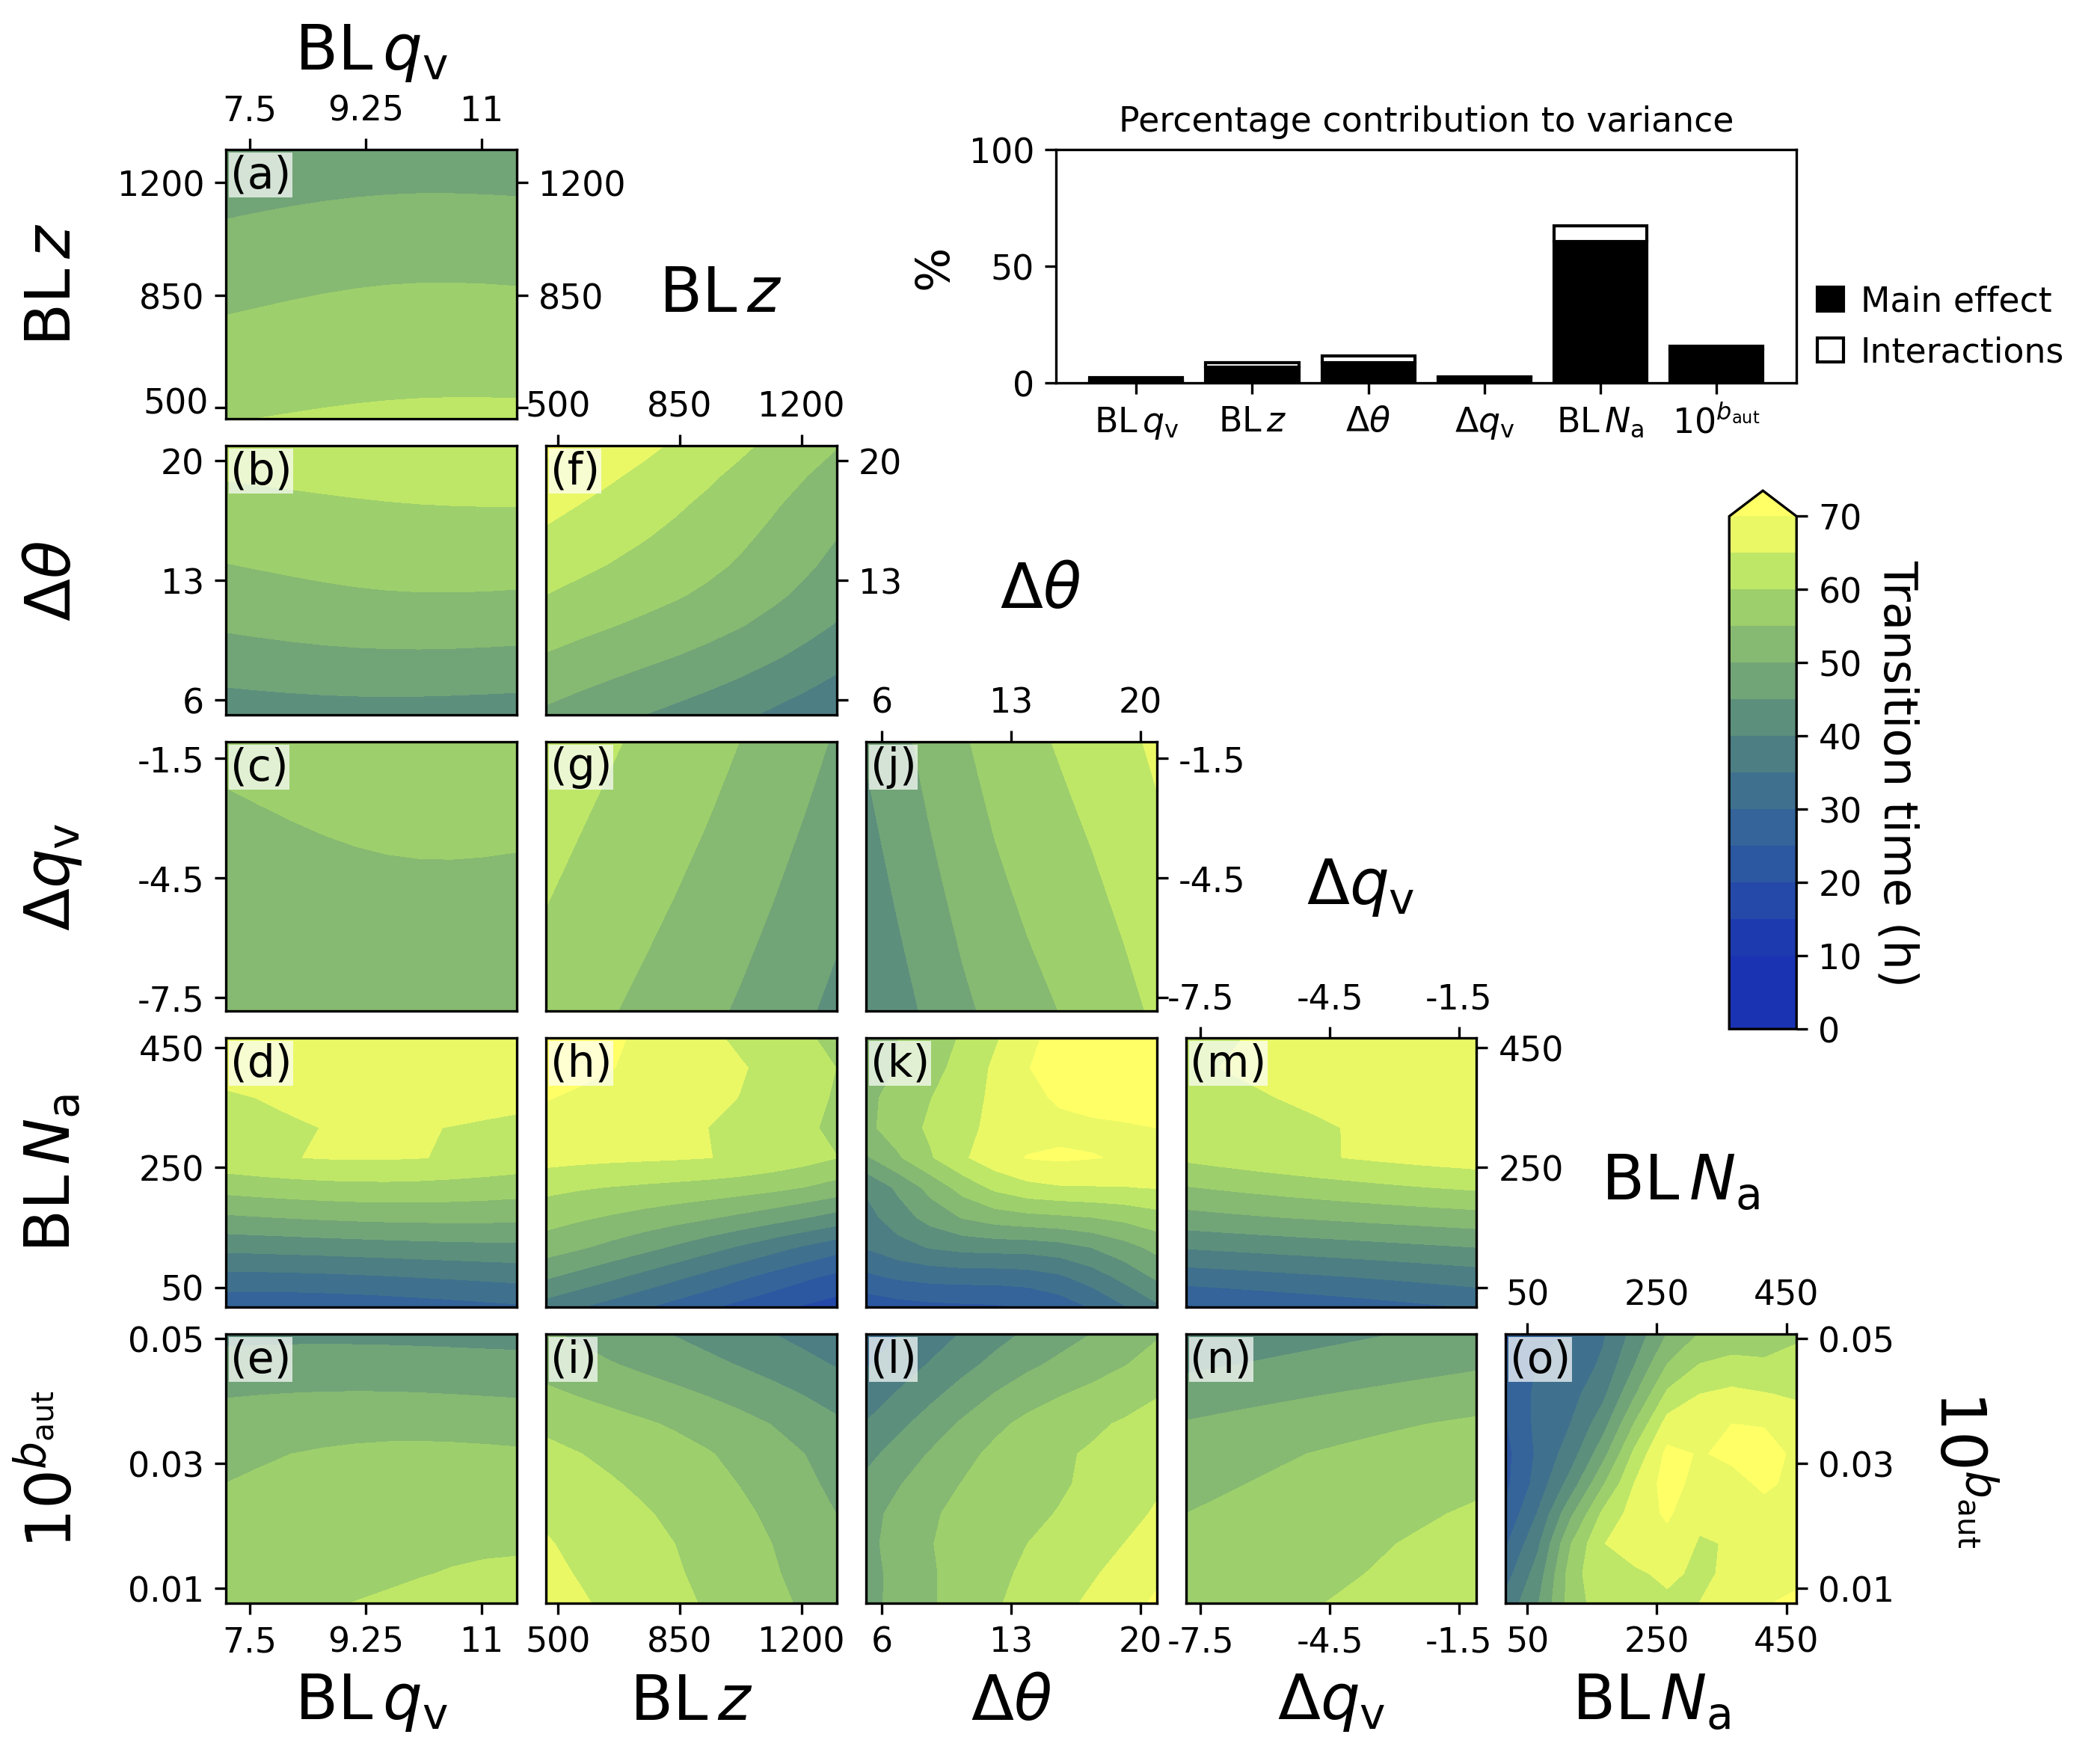

In [62]:
### Mean surfaces
fig = plt.figure(figsize=(10,8),dpi=300)
gs0 = GridSpec(5, 5, hspace=0.1, wspace=0.1,left=0.10,bottom=0.09,top=0.9,right=0.8)

axes = add_pairwise_grid(gs0, tic_locs)

for ax, (i,j), x_lims, y_lims in zip(axes.values(), combinations(range(6), 2), axes_x_limits, axes_y_limits):
    mean_pair = np.loadtxt(f"predictions/mean_pairs/mean_pair_transition_time_{i}{j}_nv.csv", delimiter=',')

    x = np.linspace(x_lims[0], x_lims[1], 10)
    y = np.linspace(y_lims[0], y_lims[1], 10)
    x_, y_ = np.meshgrid(x, y)

    c_obj = ax.contourf(x_, y_, mean_pair, cmap=cmap1, norm=plt.Normalize(10,70), levels=np.linspace(0,70,15), extend='max')
    c_obj = ax.contourf(x_, y_, mean_pair, cmap=cmap1, norm=plt.Normalize(10,70), levels=np.linspace(0,70,15), extend='max')
    #c_obj = ax.scatter(design[:,i], design[:,j], c=data[:,1], cmap=cmap1, norm=plt.Normalize(10,70), marker='s', s=10)

gs_c = GridSpec(1, 1,left=0.77,bottom=0.41,top=0.71, right=0.8)
cax = fig.add_subplot(gs_c[0])
cbar = fig.colorbar(c_obj, cax=cax, norm=plt.Normalize(10,70), extend='max')
cbar.ax.set_ylabel('Transition time (h)', rotation=-90, va="bottom", fontsize=BIGGER_SIZE)

gs1 = GridSpec(1, 1,left=0.47,bottom=0.77,top=0.9,right=0.8)
sa_ax = fig.add_subplot(gs1[0])
sa_output = np.loadtxt("sa_output/sobols_transition_time.csv",skiprows=1,delimiter=',')
main_effect = sa_output[:,0]
total_effect = sa_output[:,1]

sa_ax = emplt.plot_sa_bars(sa_ax, main_effect, total_effect, p_labels)
sa_ax.set_title("Percentage contribution to variance")
sa_ax.set_ylabel("%", fontsize=BIGGER_SIZE)
sa_ax.legend(loc=(1.01, 0), handlelength=0.75, frameon=False, fontsize=SMALL_SIZE,handletextpad=0.5)

fig.savefig("figures/pairs_grid10_transition_time.png", facecolor='white', dpi=300)
fig.savefig("figures/pairs_grid10_transition_time.pdf", facecolor='white', dpi=300)

## RWP Mean

### Latin hypercube predictions

In [63]:
design = np.loadtxt("predictions/lh1000_design.csv", delimiter=',', skiprows=1)
data   = np.loadtxt("predictions/lh1000_rwp_mean_nv.csv", delimiter=',', skiprows=1)

design[:,5] = [10**x for x in design[:,5]]

tic_locs = [(7.5, 9.25, 11), (500, 850, 1200), (6, 13, 20), (-7.5, -4.5, -1.5),
                (50, 250, 450), (0.01, 0.03, 0.05)]

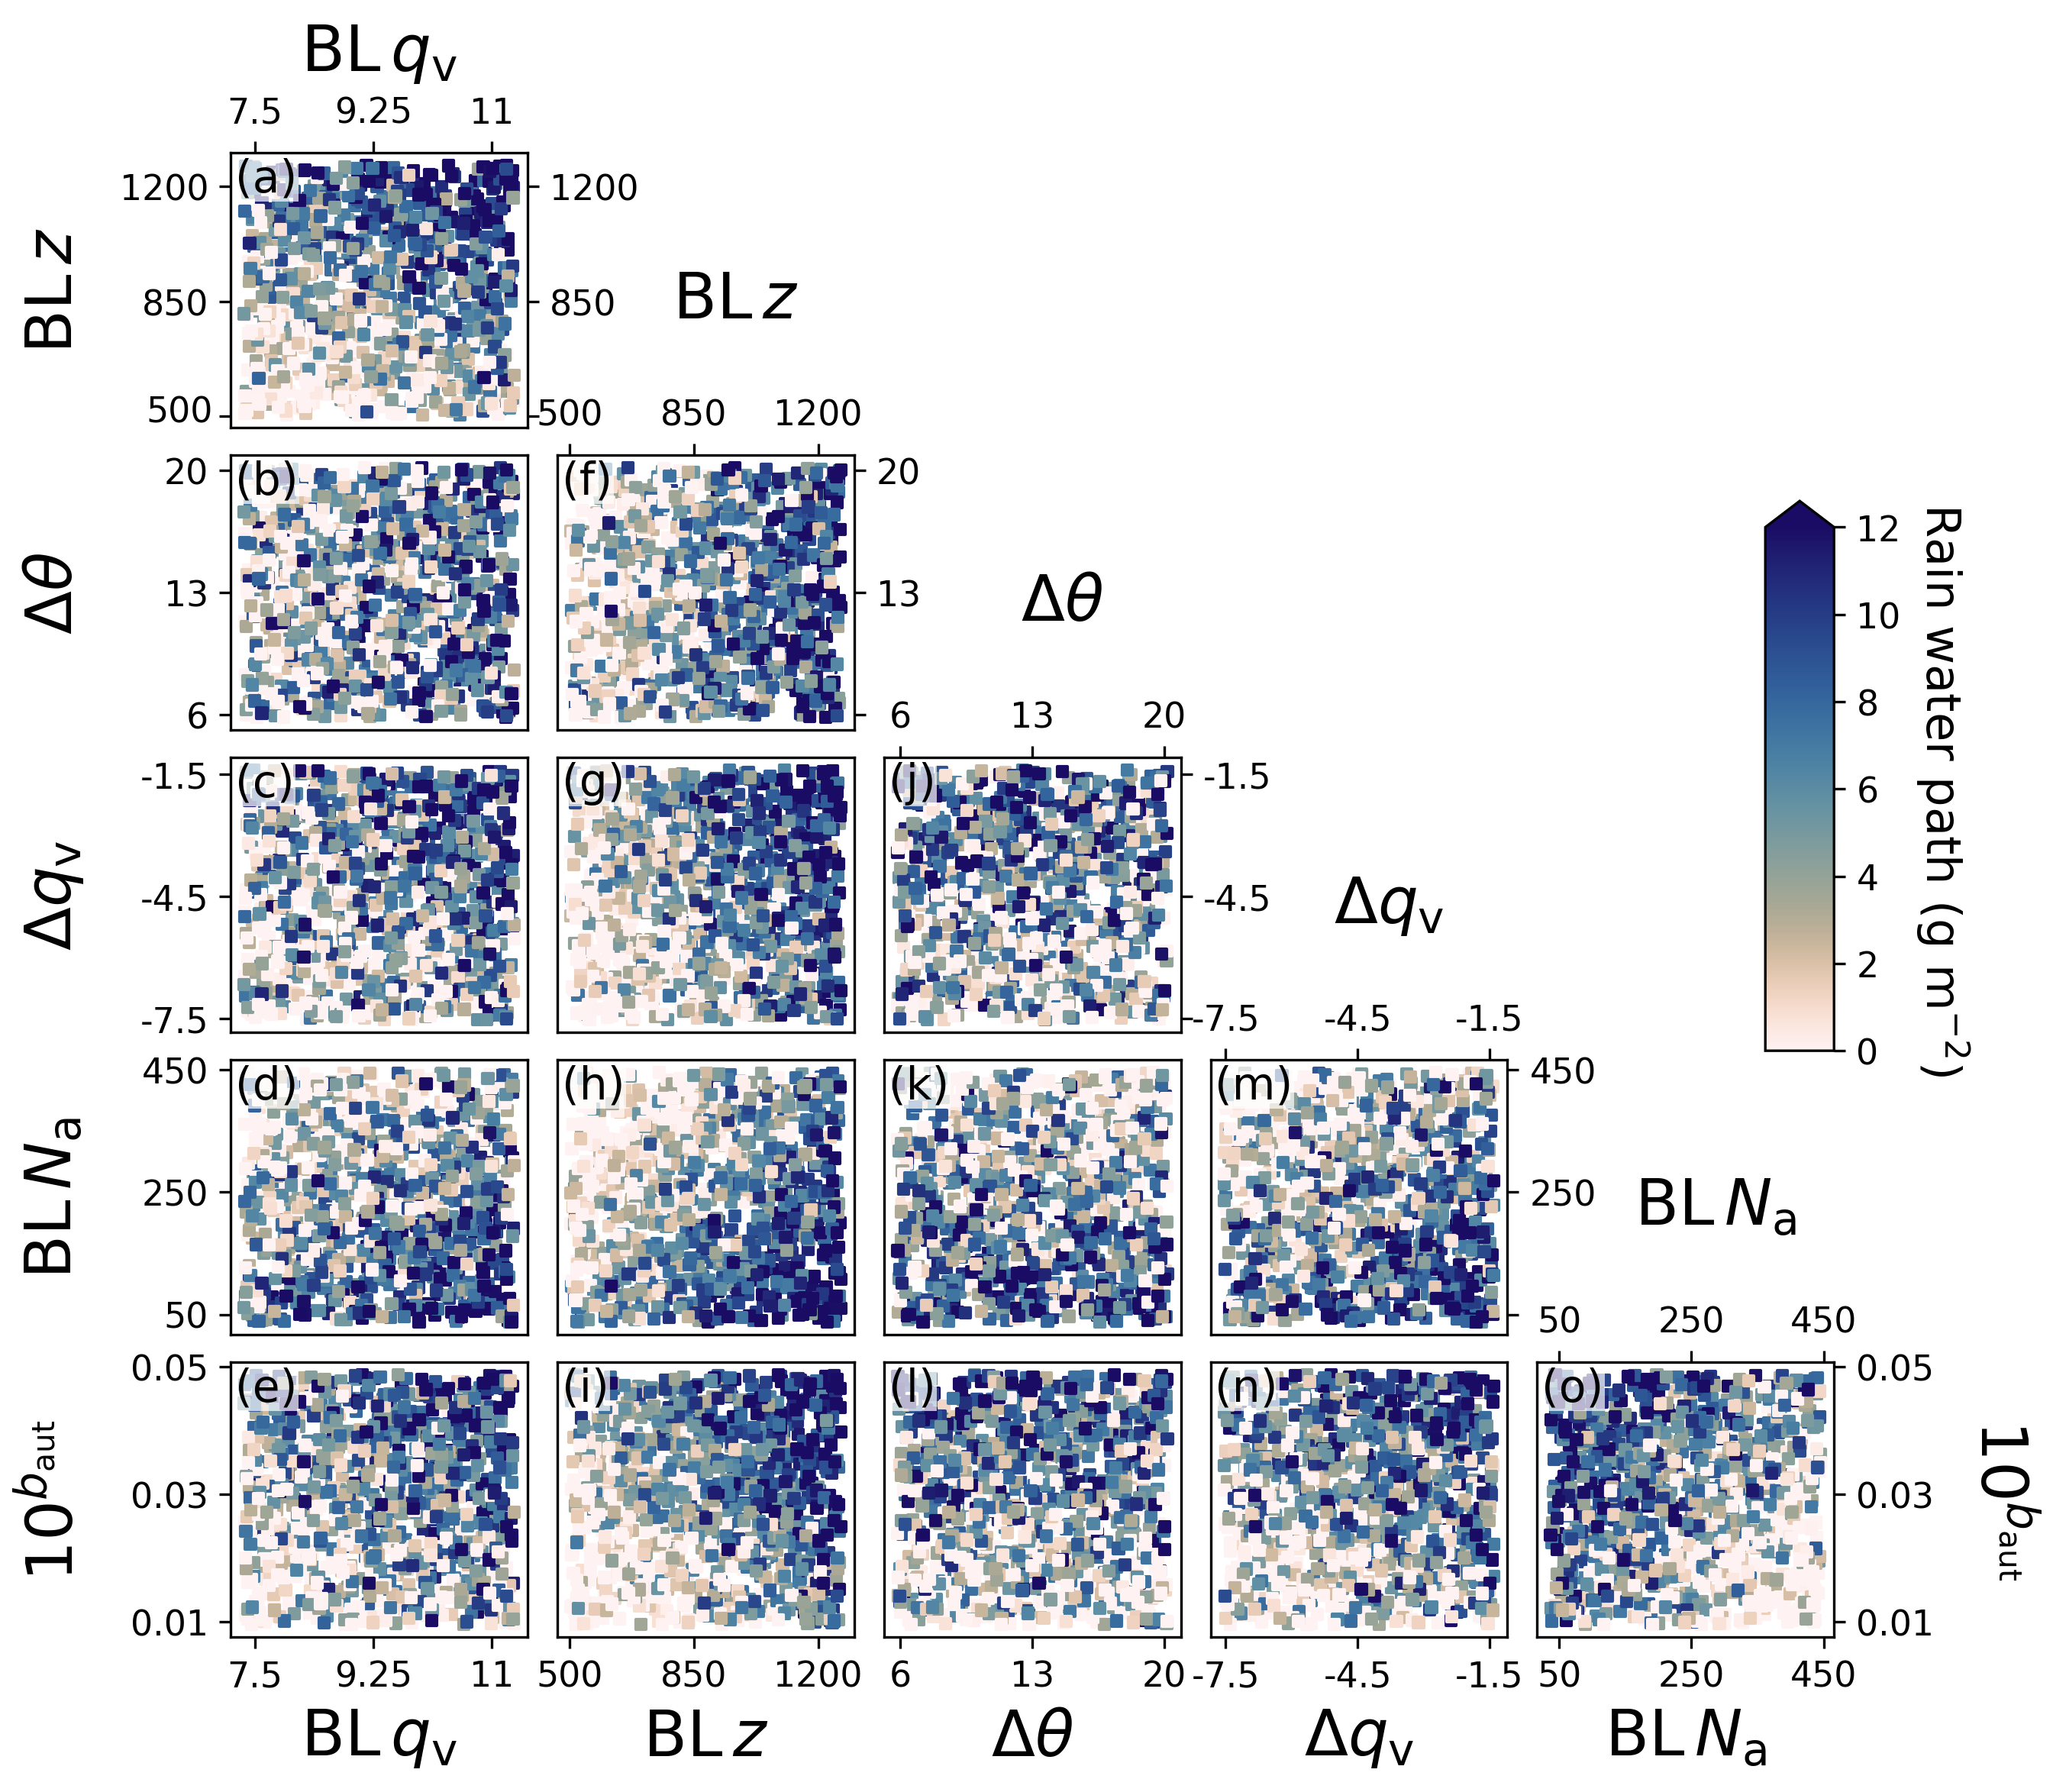

In [64]:
### 1000 LH predictions for transition time
fig = plt.figure(figsize=(10,8),dpi=300)
gs0 = GridSpec(5, 5, hspace=0.1, wspace=0.1,left=0.10,bottom=0.09,top=0.9,right=0.8)

axes = add_pairwise_grid(gs0, tic_locs)

axes_x_limits = []
axes_y_limits = []
rwp_min = 0
rwp_max = 12
for ax, (i,j) in zip(axes.values(), combinations(range(6), 2)):
    c_obj = ax.scatter(design[:,i], design[:,j], c=data[:,1], cmap=cmap2, norm=plt.Normalize(rwp_min,rwp_max), marker='s', s=10)
    axes_x_limits.append(ax.get_xlim())
    axes_y_limits.append(ax.get_ylim())

gs_c = GridSpec(1, 1,left=0.77,bottom=0.41,top=0.71, right=0.8)
cax = fig.add_subplot(gs_c[0])
cbar = fig.colorbar(c_obj, cax=cax, extend='max')
cbar.ax.set_ylabel('Rain water path (g m$^{-2}$)', rotation=-90, va="bottom", fontsize=BIGGER_SIZE)

fig.savefig("figures/pairs_lh_1000_rwp_mean.png", facecolor='white', dpi=300)
fig.savefig("figures/pairs_lh_1000_rwp_mean.pdf", facecolor='white', dpi=300)

### Average grid predictions

$\mathrm{BL}\,\mathit{q}_{\mathrm{v}}$ has average main effect contribution of 10.65%
$\mathrm{BL}\,\mathit{z}$ has average main effect contribution of 35.06%
$\Delta\theta$ has average main effect contribution of 0.30%
$\Delta\mathit{q}_{\mathrm{v}}$ has average main effect contribution of 11.06%
$\mathrm{BL}\,\mathit{N}_{\mathrm{a}}$ has average main effect contribution of 22.16%
10$^{b_{\mathrm{aut}}}$ has average main effect contribution of 19.26%


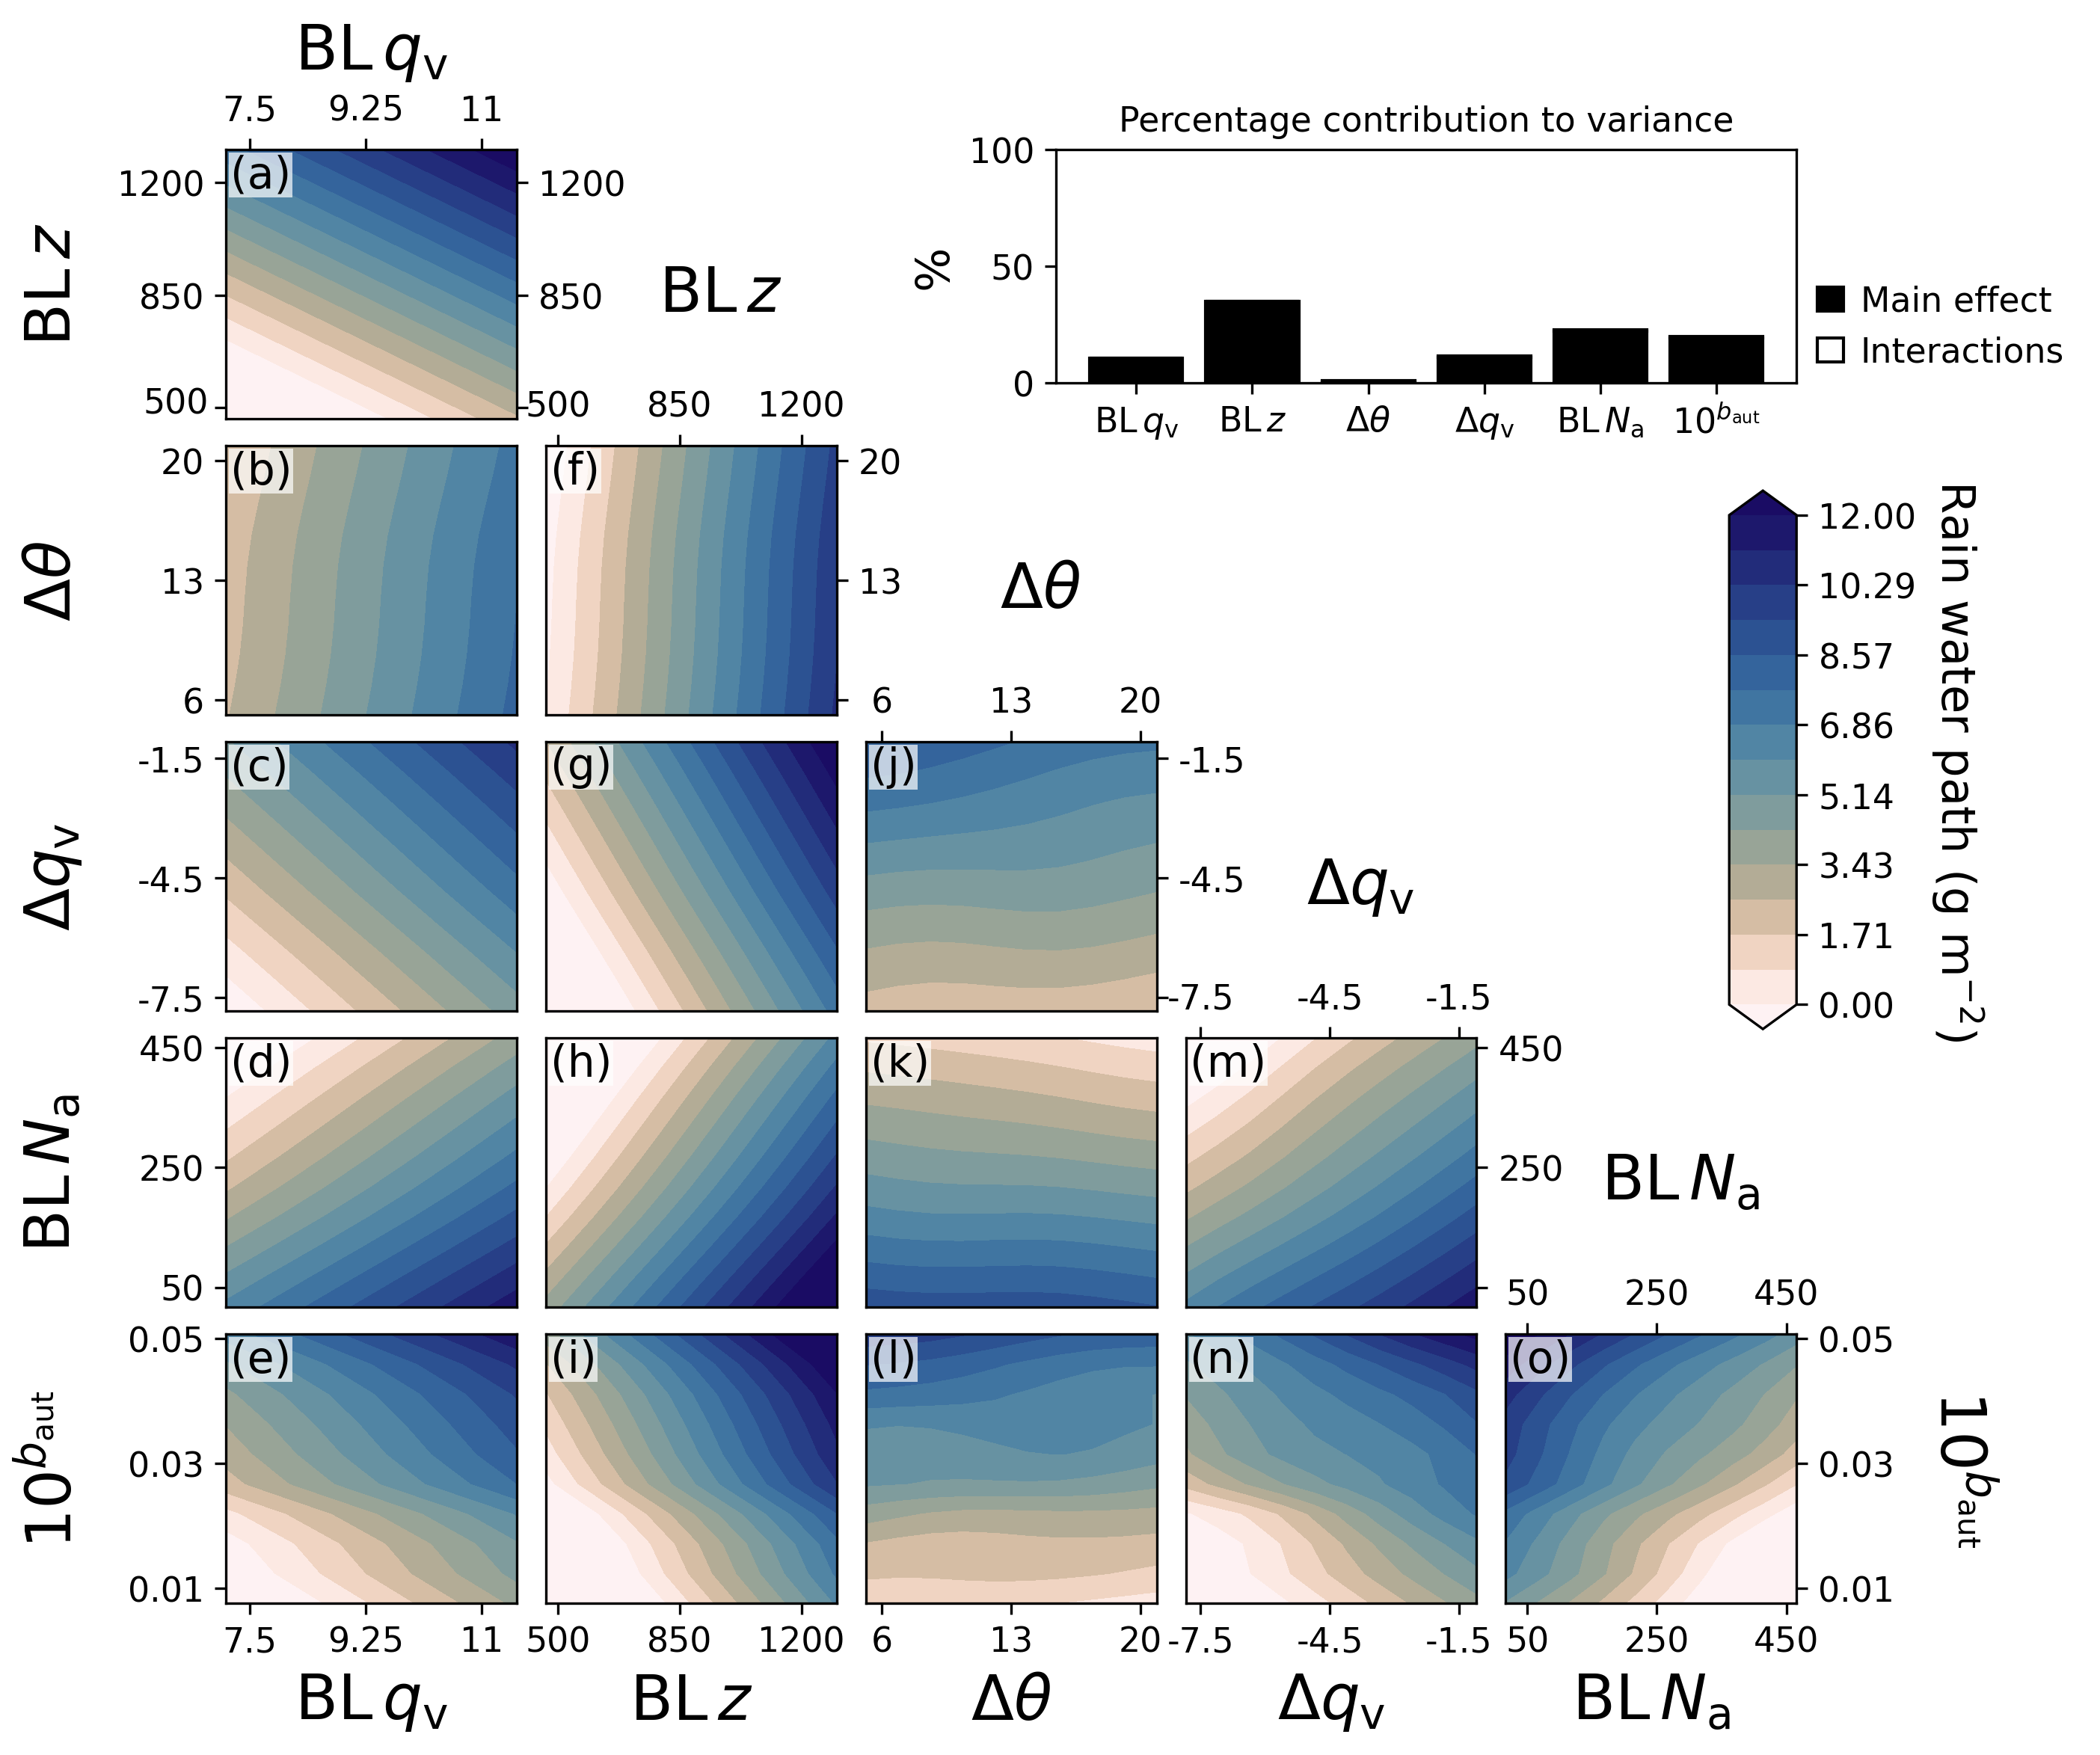

In [65]:
### Mean gridded predictions for rwp transition
fig = plt.figure(figsize=(10,8),dpi=300)
gs0 = GridSpec(5, 5, hspace=0.1, wspace=0.1,left=0.10,bottom=0.09,top=0.9,right=0.8)

axes = add_pairwise_grid(gs0, tic_locs)

for ax, (i,j), x_lims, y_lims in zip(axes.values(), combinations(range(6), 2), axes_x_limits, axes_y_limits):
    mean_pair = np.loadtxt(f"predictions/mean_pairs/mean_pair_rwp_mean_{i}{j}_nv.csv", delimiter=',')

    x = np.linspace(x_lims[0], x_lims[1], 10)
    y = np.linspace(y_lims[0], y_lims[1], 10)
    x_, y_ = np.meshgrid(x, y)

    c_obj = ax.contourf(x_, y_, mean_pair, cmap=cmap2, norm=plt.Normalize(rwp_min,rwp_max), levels=np.linspace(rwp_min,rwp_max,15), extend='both')
    c_obj = ax.contourf(x_, y_, mean_pair, cmap=cmap2, norm=plt.Normalize(rwp_min,rwp_max), levels=np.linspace(rwp_min,rwp_max,15), extend='both')
    #c_obj = ax.scatter(design[:,i], design[:,j], c=data[:,1], cmap=cmap, norm=plt.Normalize(0,12), marker='s', s=10)

gs_c = GridSpec(1, 1,left=0.77,bottom=0.41,top=0.71, right=0.8)
cax = fig.add_subplot(gs_c[0])
cbar = fig.colorbar(c_obj, cax=cax, norm=plt.Normalize(0,12))#, extend='max')
cbar.ax.set_ylabel('Rain water path (g m$^{-2}$)', rotation=-90, va="bottom", fontsize=BIGGER_SIZE)

gs1 = GridSpec(1, 1,left=0.47,bottom=0.77,top=0.9,right=0.8)
sa_ax = fig.add_subplot(gs1[0])
sa_output = np.loadtxt("sa_output/sobols_rwp_mean.csv",skiprows=1,delimiter=',')
main_effect = sa_output[:,0]
total_effect = sa_output[:,1]

sa_ax = emplt.plot_sa_bars(sa_ax, main_effect, total_effect, p_labels)
sa_ax.set_title("Percentage contribution to variance")
sa_ax.set_ylabel("%", fontsize=BIGGER_SIZE)
sa_ax.legend(loc=(1.01, 0), handlelength=0.75, frameon=False, fontsize=SMALL_SIZE,handletextpad=0.5)

fig.savefig("figures/pairs_grid10_rwp_mean.png", facecolor='white', dpi=300)
fig.savefig("figures/pairs_grid10_rwp_mean.pdf", facecolor='white', dpi=300)